# SI221 - TP K-nearest neighbors

### Données

Nous allons travailler sur des images de chiffres manuscrits (de 0 à 9), provenant du dataset MNIST. Ces images, de 28 $\times$ 28 pixels, sont présentées comme des vecteurs lignes d'entiers compris entre $0$ et $255$. On y associe des étiquettes, indiquant quel est le chiffre représenté sur l'image (ici, l'étiquette correspondant au chiffre '0' est '10'. 

In [1]:
import numpy as np
import scipy.io

In [4]:
# Careful, we need to convert the data to float - if we keep the encoding as 8-bit integer,
# we will certainly have issues when applying numpy functions to the data 
train_data = scipy.io.loadmat('data/data_app.mat')['x'].astype(float)
test_data = scipy.io.loadmat('data/data_test.mat')['x'].astype(float)

In [5]:
train_labels = scipy.io.loadmat('data/data_app.mat')['S'].reshape(-1)
test_labels = scipy.io.loadmat('data/data_test.mat')['S'].reshape(-1)

Quelle est la taille de l’ensemble d’entraînement et de l’ensemble de test ? Les exemples
sont-ils équirépartis suivant les classes ? Affichez les premières images de l'ensemble d'entraînement ainsi que les étiquettes correspondantes. 

In [10]:
train_size = train_data.shape[0]
test_size = test_data.shape[0]

print("Training set size:", train_size)
print("Test set size:", test_size)


Training set size: 1000
Test set size: 300


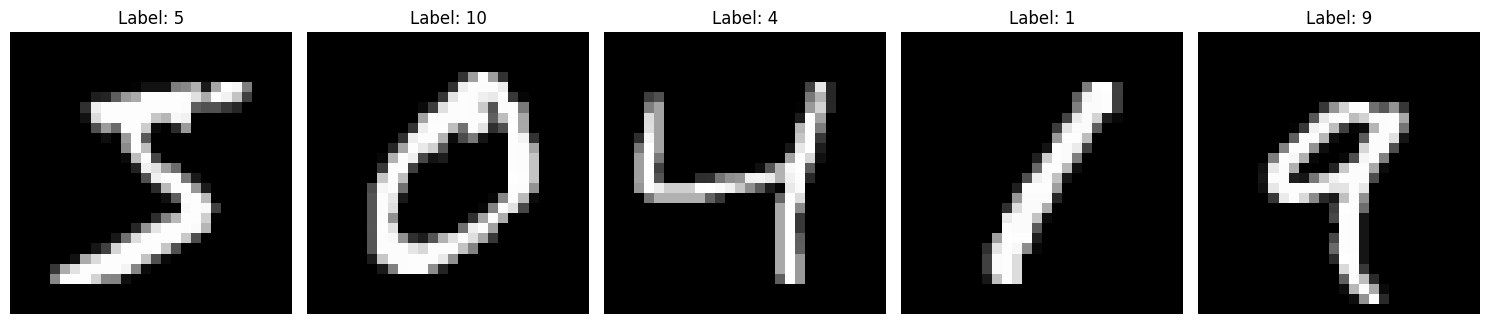

In [24]:
import matplotlib.pyplot as plt

num_images = 5

# Create a grid of subplots
fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

# Iterate over the images
for i in range(num_images):
    image = train_data[i]
    label = train_labels[i]
    
    image = image.reshape(28, 28)
    
    # Plot the image in the corresponding subplot
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(f"Label: {label}")
    axs[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Implémentez la méthode des $k$-plus proche voisins en prenant comme caractéristiques les valeurs des
pixels. On donnera, pour différentes valeurs du paramètre k (k=1, 3, 4, 5):
- Le taux d’erreur.
- La matrice de confusion - La matrice de confusion est une matrice de taille $10\times10$ dont l’élément d’indice (i,j) est le nombre de vecteurs de la classe i qui ont été affectés à la classe j par la méthode.
- Visualisez quelques confusions entre caractères.

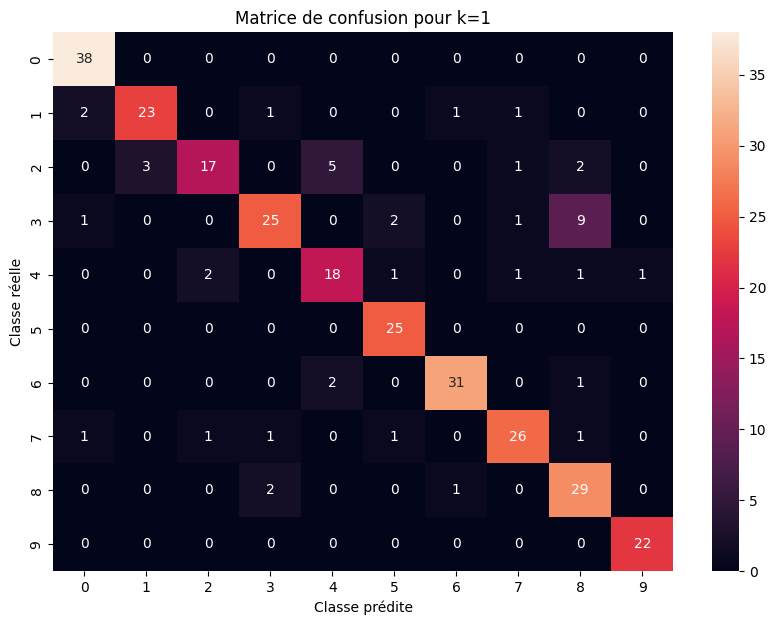

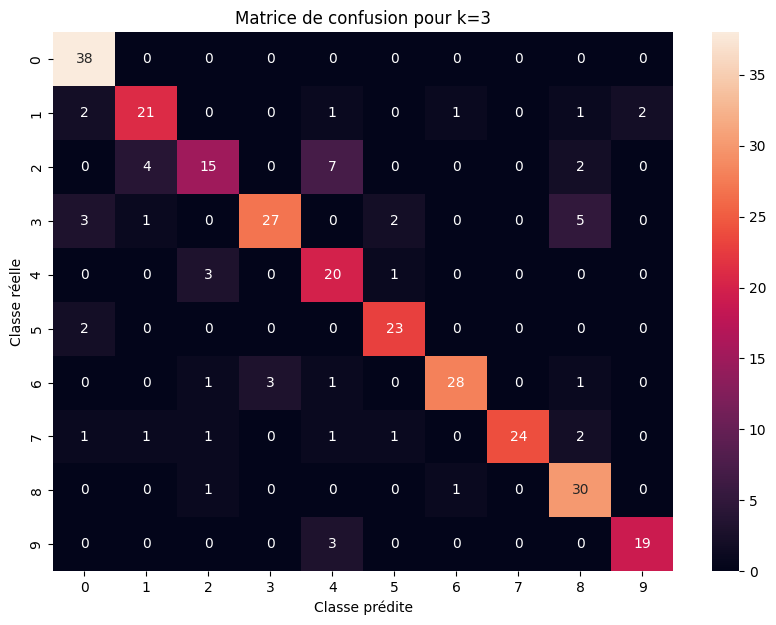

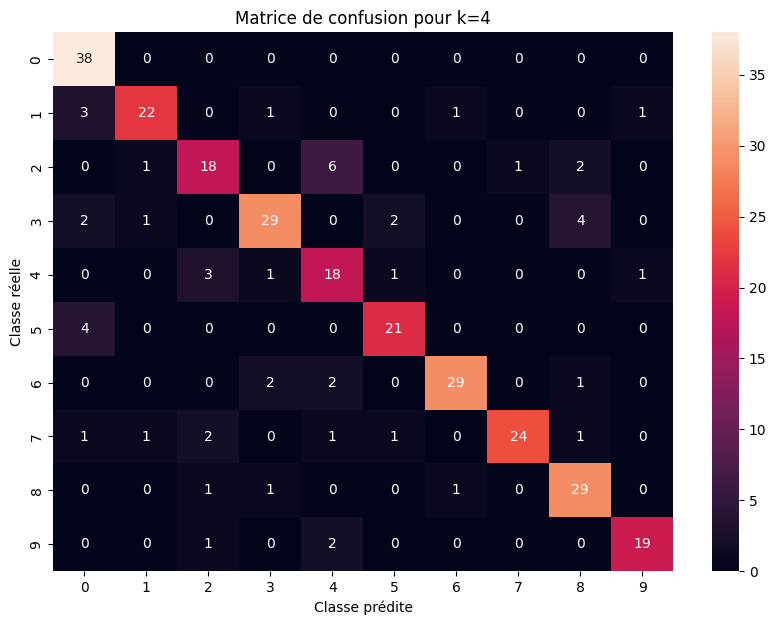

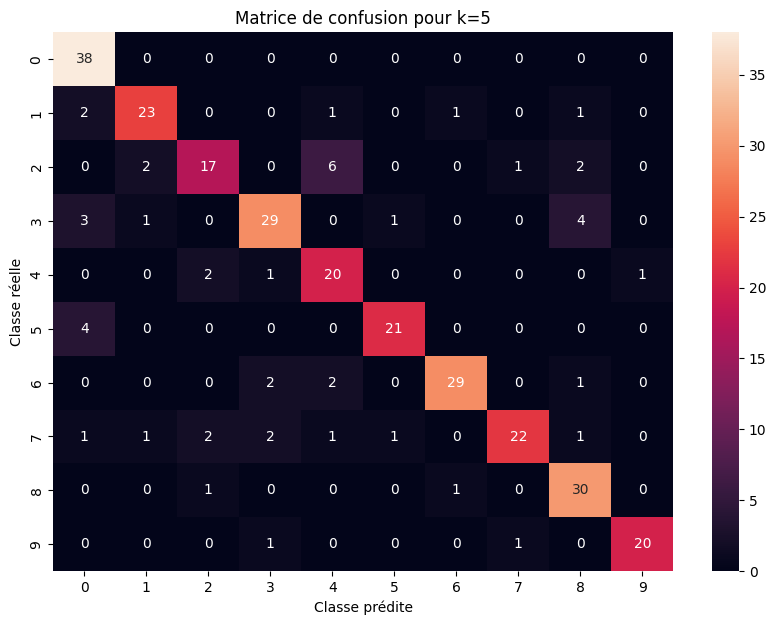

Taux d'erreur pour chaque valeur de k: [0.15333333333333332, 0.18333333333333332, 0.17666666666666667, 0.17]


In [33]:
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X_train = train_data[:train_size]
y_train = train_labels[:train_size]
X_test = test_data[:test_size]
y_test = test_labels[:test_size]

k_values = [1, 3, 4, 5]

error_rates = []
confusion_matrices = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)
    
    cm = confusion_matrix(y_test, y_pred) 
    
    confusion_matrices.append(cm) 

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Matrice de confusion pour k={k}")
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.show()

print("Taux d'erreur pour chaque valeur de k:", error_rates)



- Construisez des prototypes (au moins un par classe) à partir des images de l’ensemble d’apprentissage, et visualisez-les. Le prototype peut être par exemple la moyenne des exemples correspondants à chaque classe. 
- Classez les images de test en les comparant aux prototypes.
- Comparez avec les résultats obtenus précedemment.

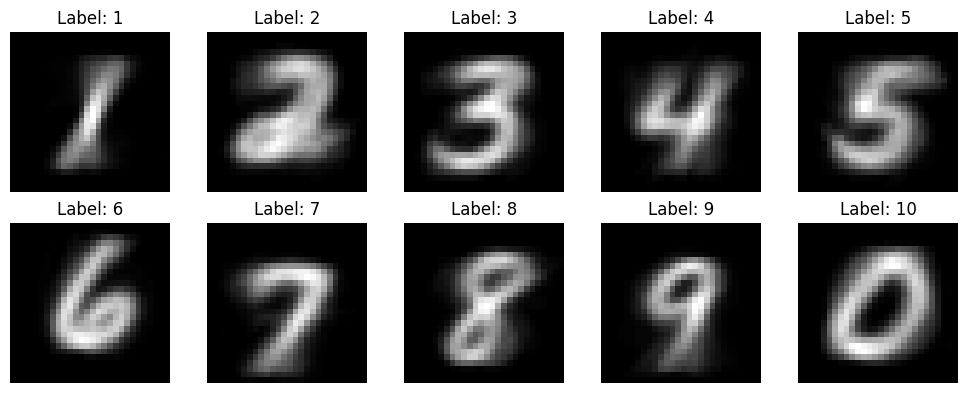

In [41]:
prototypes = []
for i in range(1, 11):
    class_examples = X_train[y_train == i]
    class_prototype = np.mean(class_examples, axis=0)
    prototypes.append(class_prototype)

model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

y_pred_labels = model.predict(prototypes)

y_pred_labels = y_pred_labels.astype(int)

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(prototypes[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f"Label: {y_pred_labels[i]}")
    axs[i].axis('off')
plt.tight_layout()
plt.show()
